In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Nabee/Downloads/Data-Science-Capstone-Projects-master/Data-Science-Capstone-Projects-master/health care diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
cols_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
data[cols_with_null_as_zero] = data[cols_with_null_as_zero].replace(0,np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

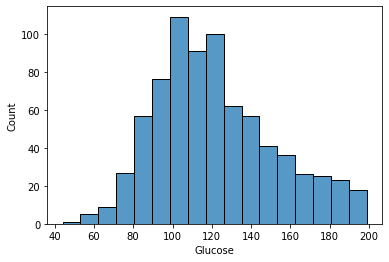

In [10]:
sns.histplot(data['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

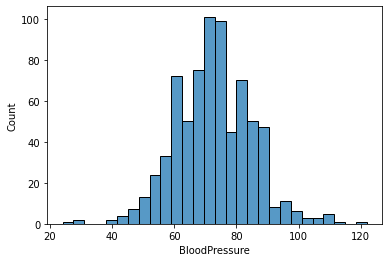

In [11]:
sns.histplot(data['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

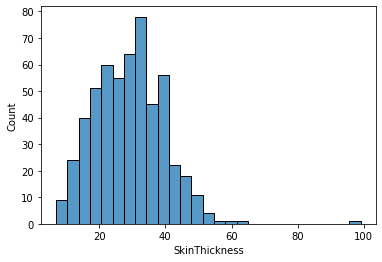

In [12]:
sns.histplot(data['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

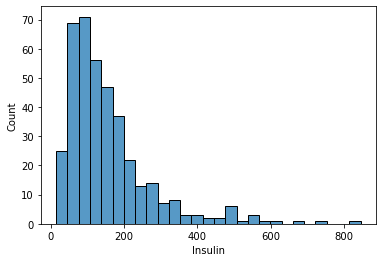

In [13]:
sns.histplot(data['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

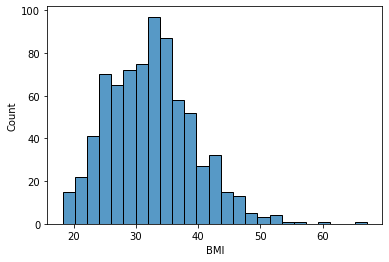

In [14]:
sns.histplot(data['BMI'])

In [15]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [16]:
mean_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
data[mean_cols] = data[mean_cols].fillna(data[mean_cols].mean())

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

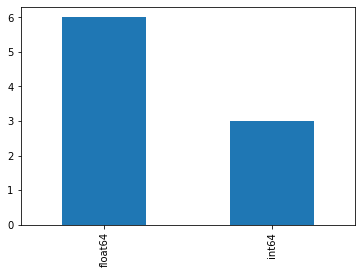

In [18]:
data.dtypes.value_counts().plot(kind='bar')

0    500
1    268
Name: Outcome, dtype: int64

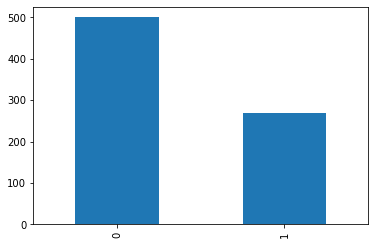

In [19]:
data['Outcome'].value_counts().plot(kind='bar')
data['Outcome'].value_counts()

# SMOTE

In [20]:
x_res = data.drop('Outcome', axis=1)
y_res = data['Outcome']

In [21]:
print(x_res.shape)
print(y_res.shape)

(768, 8)
(768,)


In [22]:
!pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
my_smote = SMOTE(random_state=1)

In [25]:
x, y = my_smote.fit_resample(x_res,y_res)

In [26]:
print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


In [27]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [28]:
rs_data = pd.concat([x, y], axis=1)
rs_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,6,160.497133,55.491398,30.922879,175.000000,30.110579,0.587917,39,1
996,3,105.459916,84.965643,29.571862,125.000000,31.640265,0.513635,36,1
997,9,129.000000,63.833559,39.972711,125.000000,40.374899,0.440389,39,1
998,11,149.774398,104.860442,29.153420,125.000000,37.913012,0.474978,44,1


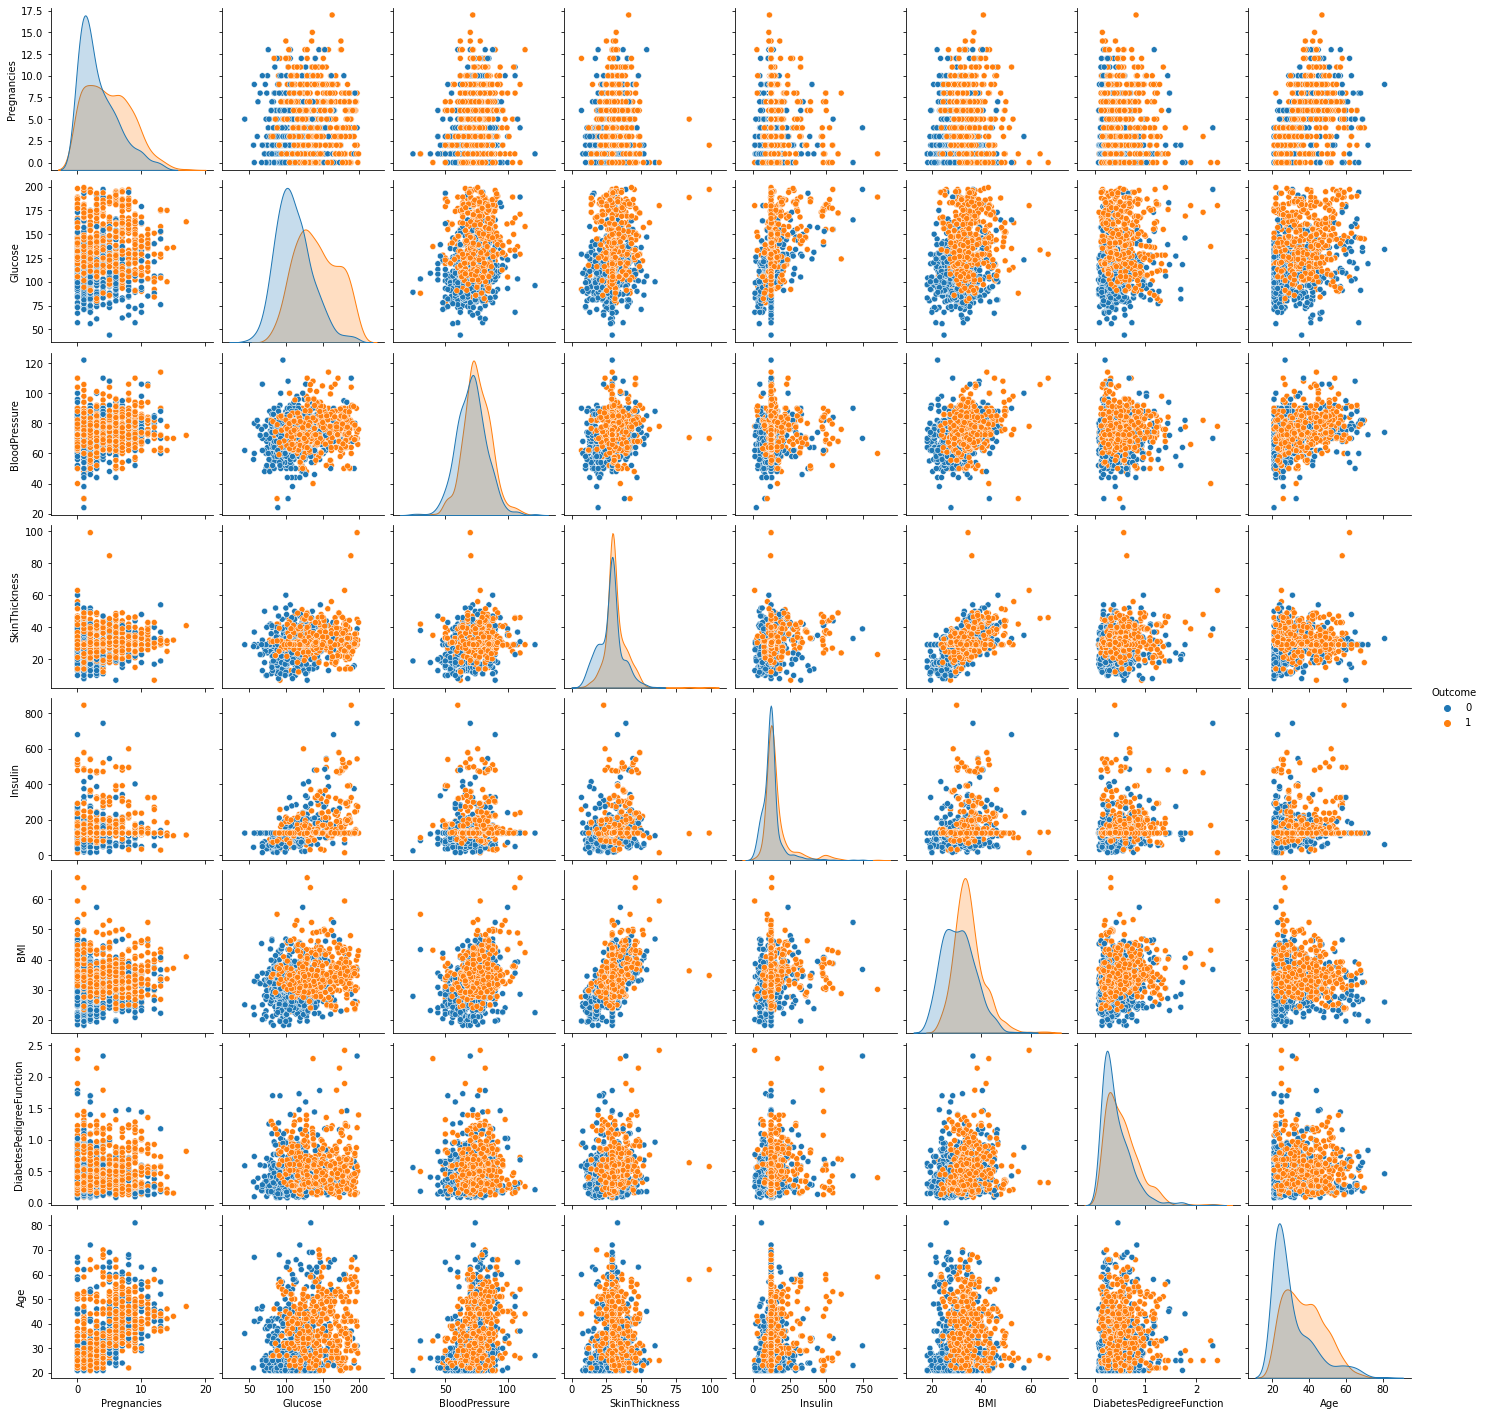

In [29]:
sns.pairplot(data=rs_data, hue='Outcome')

<AxesSubplot:>

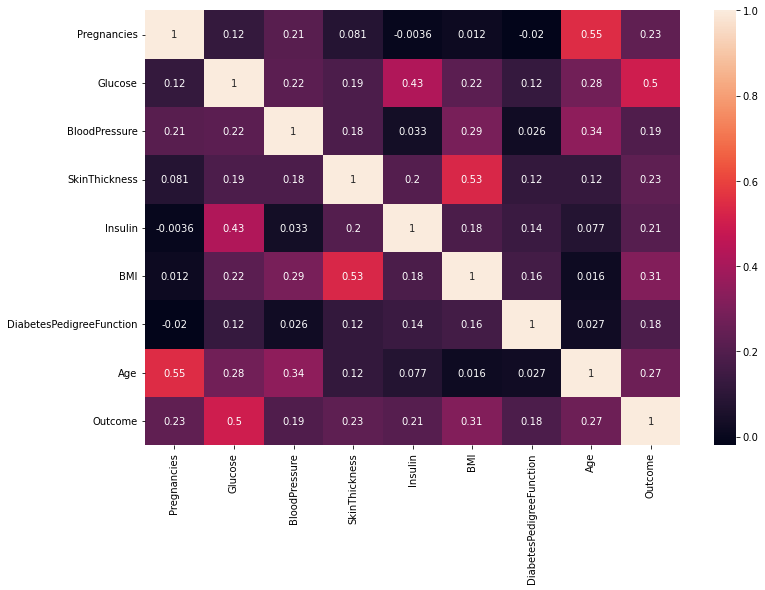

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(rs_data.corr(), annot=True)

In [31]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [33]:
x_train.shape, x_test.shape

((850, 8), (150, 8))

In [34]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [35]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()

In [36]:
lr1.fit(x_train,y_train)

C:\Users\Nabee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
lr1.score(x_train,y_train)

0.7482352941176471

In [38]:
lr1.score(x_test, y_test)

0.7

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [40]:
parameters = {'C':np.logspace(-5, 5, 50)}

In [41]:
gs_lr = GridSearchCV(lr1, param_grid = parameters, cv=5, verbose=0)
gs_lr.fit(x, y)

C:\Users\Nabee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nabee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [42]:
gs_lr.best_params_

{'C': 0.018420699693267165}

In [43]:
gs_lr.best_score_

0.748

In [44]:
lr2 = LogisticRegression(C=0.018420699693267165, max_iter=300)

In [46]:
lr2.fit(x_train,y_train)

LogisticRegression(C=0.018420699693267165, max_iter=300)

In [47]:
lr2.score(x_train,y_train)

0.7423529411764705

In [48]:
lr2.score(x_test, y_test)

0.76

AUC: 0.842


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

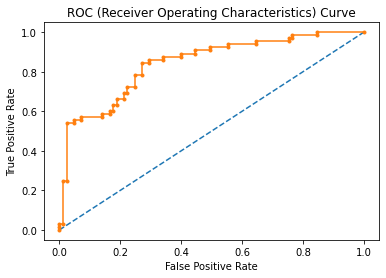

In [49]:
probs = lr2.predict_proba(x_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

In [64]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0)

In [51]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
dt1.score(x_train,y_train)

1.0

In [53]:
dt1.score(x_test, y_test)

0.7933333333333333

In [54]:
parameters = {
    'max_depth':[1,2,3,4,5,None]}

In [55]:
gs_dt = GridSearchCV(dt1, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [56]:
gs_dt.best_params_

{'max_depth': None}

In [57]:
gs_dt.best_score_

0.7609999999999999

In [58]:
dt2 = DecisionTreeClassifier(max_depth=4)

In [59]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [60]:
dt2.score(x_train,y_train)

0.7941176470588235

In [61]:
dt2.score(x_test, y_test)

0.7666666666666667

AUC: 0.819


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

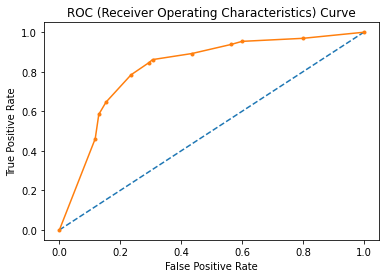

In [62]:
probs = dt2.predict_proba(x_test)                
probs = probs[:, 1]                             

auc_dt = roc_auc_score(y_test, probs)            
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')      
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.759 auc_pr=0.779 ap=0.715


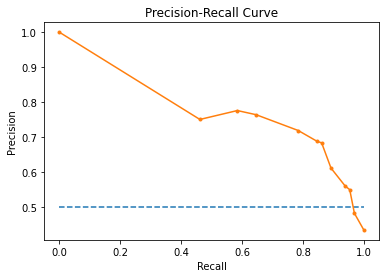

In [63]:
pred_y_test = dt2.predict(x_test)                                     
precision, recall, thresholds = precision_recall_curve(y_test, probs) 
f1 = f1_score(y_test, pred_y_test)                                  
auc_dt_pr = auc(recall, precision)                                   
ap = average_precision_score(y_test, probs)                          
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                        
plt.plot(recall, precision, marker='.')                               
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [65]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [67]:
rf1 = RandomForestClassifier(random_state=0)

In [68]:
rf1.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
rf1.score(x_train, y_train)

1.0

In [71]:
rf1.score(x_test, y_test)

0.8133333333333334

In [72]:
parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

In [73]:
gs_dt = GridSearchCV(estimator=rf1, param_grid=parameters, cv=5, verbose=0)
gs_dt.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [74]:
gs_dt.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

In [75]:
gs_dt.best_score_

0.8210000000000001

In [76]:
rf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=100)

In [77]:
rf2.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
rf2.score(x_train,y_train)

1.0

In [79]:
rf2.score(x_test, y_test)

0.8

AUC: 0.860


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

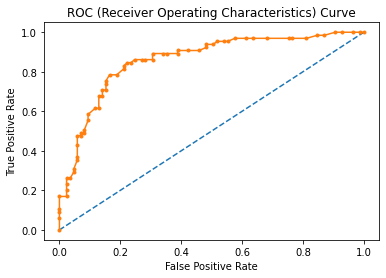

In [80]:
probs = rf2.predict_proba(x_test)               
probs = probs[:, 1]                              

auc_rf = roc_auc_score(y_test, probs)            
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.779 auc_pr=0.816 ap=0.817


Text(0.5, 1.0, 'Precision-Recall Curve')

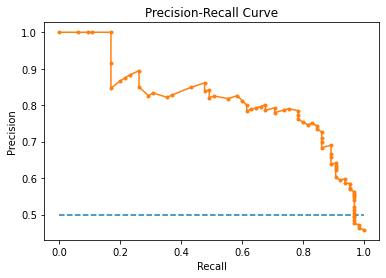

In [82]:
pred_y_test = rf2.predict(x_test)                                     
precision, recall, thresholds = precision_recall_curve(y_test, probs) 
f1 = f1_score(y_test, pred_y_test)                                   
auc_rf_pr = auc(recall, precision)                                    
ap = average_precision_score(y_test, probs)                           
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [83]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)

In [85]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
knn1.score(x_train,y_train)

0.8835294117647059

In [87]:
knn1.score(x_test,y_test)

0.7266666666666667

In [88]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [89]:
gs_knn = GridSearchCV(estimator=knn1, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [90]:
gs_knn.best_params_

{'n_neighbors': 3}

In [91]:
gs_knn.best_score_

0.764

In [92]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [93]:
knn2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
knn2.score(x_train,y_train)

0.8835294117647059

In [95]:
knn2.score(x_test,y_test)

0.7266666666666667

AUC: 0.839


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

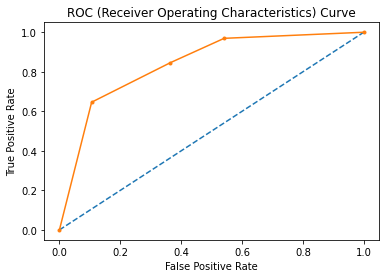

In [97]:
probs = knn2.predict_proba(x_test)              
probs = probs[:, 1]                              

auc_knn = roc_auc_score(y_test, probs)          
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.728 auc_pr=0.826 ap=0.745


Text(0.5, 1.0, 'Precision-Recall Curve')

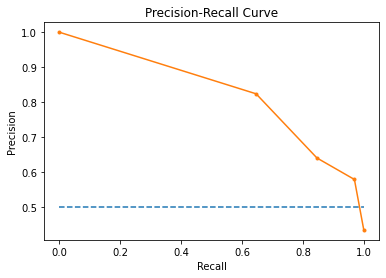

In [98]:
pred_y_test = knn2.predict(x_test)                                     
precision, recall, thresholds = precision_recall_curve(y_test, probs) 
f1 = f1_score(y_test, pred_y_test)                                    
auc_knn_pr = auc(recall, precision)                                  
ap = average_precision_score(y_test, probs)                           
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                         
plt.plot(recall, precision, marker='.')                              
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [99]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

In [100]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')

In [102]:
svm1.fit(x_train, y_train)

SVC()

In [104]:
svm1.score(x_train, y_train)

0.7411764705882353

In [105]:
svm1.score(x_test, y_test)

0.6933333333333334

In [106]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [107]:
gs_svm = GridSearchCV(estimator=svm1, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [108]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

In [109]:
gs_svm.best_score_

0.805

In [110]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005, probability=True)

In [111]:
svm2.fit(x_train, y_train)

SVC(C=20, gamma=0.005, probability=True)

In [112]:
svm2.score(x_train, y_train)

0.9941176470588236

In [113]:
svm2.score(x_test, y_test)

0.8066666666666666

AUC: 0.871


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

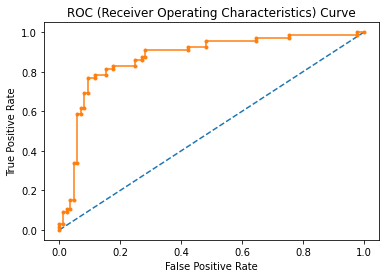

In [115]:
probs = svm2.predict_proba(x_test)              
probs = probs[:, 1]                             

auc_svm = roc_auc_score(y_test, probs)           
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.788 auc_pr=0.795 ap=0.800


Text(0.5, 1.0, 'Precision-Recall Curve')

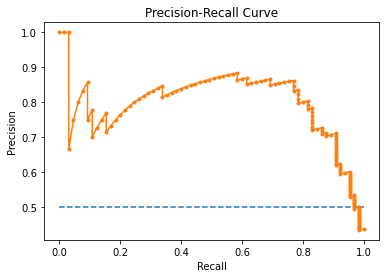

In [116]:
pred_y_test = svm2.predict(x_test)                                    
precision, recall, thresholds = precision_recall_curve(y_test, probs) 
f1 = f1_score(y_test, pred_y_test)                                    
auc_svm_pr = auc(recall, precision)                                  
ap = average_precision_score(y_test, probs)                           
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [117]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(n_estimators=100)

In [119]:
ada1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [120]:
ada1.score(x_train,y_train)

0.8635294117647059

In [121]:
ada1.score(x_test, y_test)

0.7533333333333333

In [122]:
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}

In [123]:
gs_ada = GridSearchCV(ada1, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(x, y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [124]:
gs_ada.best_params_

{'n_estimators': 300}

In [125]:
gs_ada.best_score_

0.773

In [126]:
ada2 = AdaBoostClassifier(n_estimators=500)
ada2.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=500)

In [127]:
ada2.score(x_train,y_train)

0.94

In [128]:
ada2.score(x_test, y_test)

0.72

AUC: 0.788


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

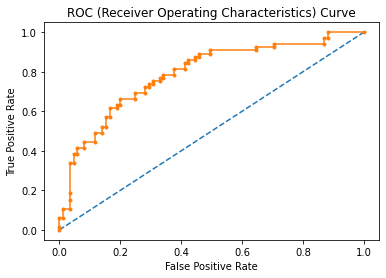

In [129]:
probs = ada2.predict_proba(x_test)               
probs = probs[:, 1]                              

auc_ada = roc_auc_score(y_test, probs)           
print('AUC: %.3f' %auc_ada)
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.691 auc_pr=0.736 ap=0.739


Text(0.5, 1.0, 'Precision-Recall Curve')

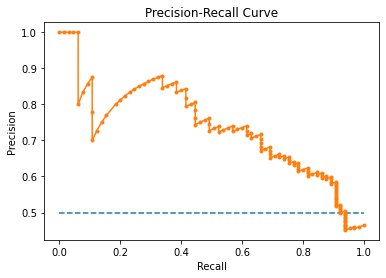

In [130]:
pred_y_test = ada2.predict(x_test)                                    
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_y_test)                                    
auc_ada_pr = auc(recall, precision)                                   
ap = average_precision_score(y_test, probs)                           
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_ada_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                              
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [131]:
models.append('ADA')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_ada)

In [132]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)

C:\Users\Nabee\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [133]:
xgb1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [134]:
xgb1.score(x_train, y_train) 

1.0

In [135]:
xgb1.score(x_test, y_test)

0.7933333333333333

In [136]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [137]:
gs_xgb = GridSearchCV(xgb1, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(x, y)

C:\Users\Nabee\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Nabee\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [138]:
gs_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 180}

In [139]:
gs_xgb.best_score_

0.8834799999999999

In [140]:
xgb2 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.05, max_depth= 7, n_estimators= 180)

In [141]:
xgb2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [142]:
xgb2.score(x_train,y_train)

0.9941176470588236

In [143]:
xgb2.score(x_test, y_test)

0.8066666666666666

AUC: 0.858


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

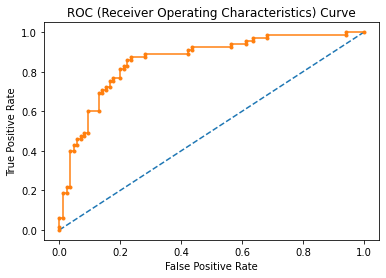

In [145]:
probs = xgb2.predict_proba(x_test)                
probs = probs[:, 1]                              

auc_xgb = roc_auc_score(y_test, probs)            
print('AUC: %.3f' %auc_xgb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.791 auc_pr=0.806 ap=0.809


Text(0.5, 1.0, 'Precision-Recall Curve')

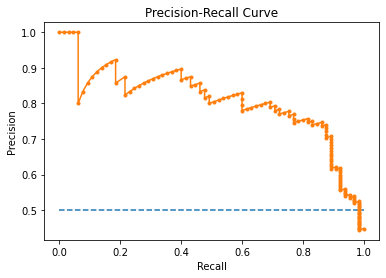

In [146]:
pred_y_test = xgb2.predict(x_test)                                     
precision, recall, thresholds = precision_recall_curve(y_test, probs) 
f1 = f1_score(y_test, pred_y_test)                                    
auc_xgb_pr = auc(recall, precision)                                    
ap = average_precision_score(y_test, probs)                           
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                              
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [147]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_xgb)

In [148]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

Text(0.5, 1.0, 'Comparison of Different Classification Algorithms')

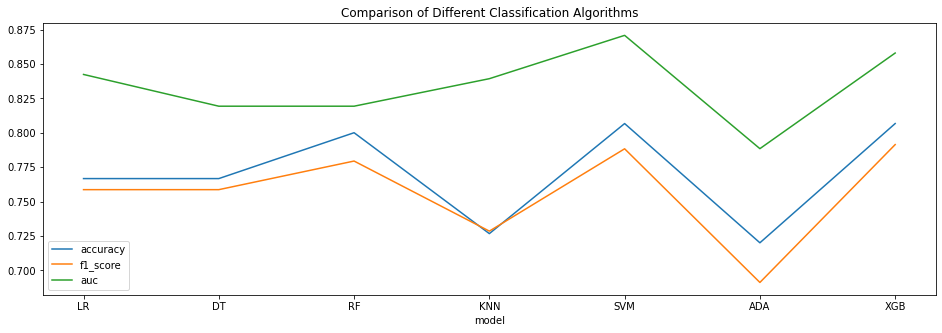

In [149]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")

In [150]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.766667,0.758621,0.842353
DT,0.766667,0.758621,0.819276
RF,0.800000,0.779412,0.819276
KNN,0.726667,0.728477,0.839276
SVM,0.806667,0.788321,0.870769
ADA,0.720000,0.691176,0.788416
XGB,0.806667,0.791367,0.857919


In [151]:
main_model = xgb2

In [154]:
cls_report = classification_report(y_test, main_model.predict(x_test))
print(cls_report)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        85
           1       0.74      0.85      0.79        65

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [155]:
confusion = confusion_matrix(y_test, main_model.predict(x_test))

In [156]:
confusion

array([[66, 19],
       [10, 55]], dtype=int64)

In [157]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     
Specificity = TN/(TN+FP)

In [158]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.807
Precision: 0.743
Sensitivity: 0.846
Specificity: 0.776
AUC: 0.860
